<a href="https://colab.research.google.com/github/mariaelisagmt/CartPole/blob/main/CartPole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartPole
É um sistema que representa um pêndulo invertido. 
O agente é um carrinho que se moveem um trilho sem atrito de uma dimensão, da esquerda ou para a direita, no carrinho uma estaca pode se mover angularmente em sentido horário e anti-horário.
O objetivo do problema é colocar o carrinho em movimento de modo que o pêndulo permaneça ereta.

#Variáveis
*   Posição p do carrinho no trilho;
*   A velocidade v do carrinho;
*   O ângulo a que a estaca forma com o eixo vertical do carrinho;
*   A velocidade angular va de movimento da estaca.

O ambiente se caracteriza como estocástico, pois não é possível determinar o resultado a partir de um estado atual, e episódico, pois o agente pode tomar qualquer uma das ações disponíveis a qualquer momento, sem que uma ação afete as demais.






#Código
Instalando do recursos e bibliotecas necessárias.

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
!pip install python-math

In [ ]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

Definições e configurações de tela.

In [ ]:
from pyvirtualdisplay import Display
tela = Display(visible=0, size=(400, 300))
tela.start()



#Ações
É uma implementação de um agente que escolhe uma ação no decorrer do tempo e o ambiente reotrna uma observação e uma recompensa.
Utilizando o ambiente **CartPole-v0** do **OpenAI** da **Gym**.

Um estado desse sistema é terminal nas seguintes situações:
*   Se o centro do carrinho atinge alguma borda do ambiente; (Sucesso)
*   Se a quantidade máxima de episódios definida é atingida; (Sucesso)
*   Se o módulo do ângulo a é maior que 12 graus (o que representa, na prática, a queda da estaca); (Fracasso)

#Recompensas
O ambiente a cada ação retorna uma recompensa que equivale ao valor 1, caso a ação resulte no (1) ou (2) o ambiente retornara um valor true na variável Done. Caso a ação faça a estaca cair a recompensa será zero.

#Funções
A função **step** retorna quatro valores importantes?

*   *observation*: um objeto específico do ambiente que representa sua observação do ambiente. 
*   *reward*: quantidade de recompensa alcançada pela ação anterior. 
*   *done*: variavél booleana que indica o fim de um episódio.
*   *info*: informações de diagnóstico úteis para depuração.


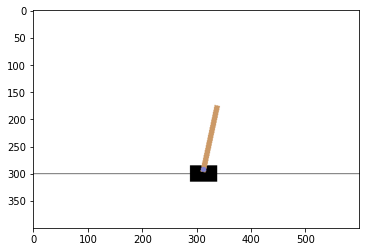

In [ ]:
for episodios in range(2):
  ambiente = gym.make("CartPole-v0") #Instancia o ambiente
  ambiente.reset()
  previa_tela = ambiente.render(mode='rgb_array') #Renderizacao da tela
  plt.imshow(previa_tela) 

  for i in range(100):
    acao = ambiente.action_space.sample() #Definindo o conjunto de acoes e observacoes validas (Discrete)
    #action = ambiente.observation_space.sample() #Definindo o conjunto de acoes e observaoes validas (Box)
    obs, reward, done, info = ambiente.step(acao) #Executa as acoes
    screen = ambiente.render(mode='rgb_array') #Renderiza na tela
    
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    if done: #Define o fim de um episódio
      break
    
ipythondisplay.clear_output(wait=True)
ambiente.close()

#Discretização
Criamos uma **classe Discretizar**, que recebe como parâmetros o limite inferior, o limite superior e a quantidade de **bins** a serem criados. 

Cada uma das variáveis é discretizada e usada para constituir um estado válido a partir da **função gen_state**.

Discretizamos um intervalo que vai de **lower** até **high** em **nbins**, todos valores receberam um mesmo valor de estado. 

In [ ]:
class Discretizar:
    def __init__(self,nbins,lower,high):
        self.nbins = nbins
        self.high = high
        self.lower = lower
        self.thresholds = np.array([])
        self.fit()

    def fit(self):
        step=(self.high-self.lower)/self.nbins 
        self.thresholds = np.arange(self.lower, self.high, step) 
        
    def transform(self,x):
        return np.digitize(x,self.thresholds)

Discretização das variáveis posição, velocidade do cartpole, ângulo do pêndulo e velocidade do ângulo.

Limites
*   Posição = [-4.8, 4.8]
*   Ângulo = [-24, 24] graus
*   Velocidade = [-100, 100]
*   Velocidade Angular = [-10, 10]

Discretização de 1000 bins para p, v e a, e de 100 bins para va.


In [ ]:
posicao_discreta = Discretizar(nbins = 1000 ,
                               lower = ambiente.observation_space.low[0], 
                               high = ambiente.observation_space.high[0])

velocidade_discreta = Discretizar(nbins = 1000, 
                                  lower = -100 , 
                                  high = 100)

angulo_discreto = Discretizar(nbins = 1000 ,
                              lower = ambiente.observation_space.low[2], 
                              high = ambiente.observation_space.high[2])

velocidade_angular_discreta = Discretizar(nbins = 100, 
                                         lower = -10 , 
                                         high = 10) 


Aplicação das variáveis discretas no ambiente a partir da **função gen_state()**

In [ ]:
#Função
gen_state = lambda  p, v, a, va : ( posicao_discreta.transform(p), 
                                    velocidade_discreta.transform(v), 
                                    angulo_discreto.transform(a), 
                                    velocidade_angular_discreta.transform(va) )

#Reinicia o ambiente
ambiente.reset()

#Aplicação
for i in range(20):
    acoes = ambiente.action_space.sample() #0 ir para trás, 1 ir pra frente
    obs, reward, done, info = ambiente.step(acoes)
    p, v, a, va = obs
    print(gen_state(p,v,a,va)) #Discretiza e gera estados válidos

(500, 501, 560, 49)
(500, 500, 554, 51)
(500, 501, 556, 49)
(501, 502, 551, 48)
(501, 501, 539, 50)
(502, 502, 534, 48)
(503, 501, 523, 50)
(503, 500, 519, 51)
(503, 499, 522, 53)
(502, 500, 532, 51)
(502, 499, 536, 53)
(502, 500, 546, 51)
(502, 501, 550, 50)
(502, 502, 547, 48)
(503, 503, 537, 47)
(504, 502, 521, 49)
(505, 503, 512, 47)
(506, 504, 496, 46)
(508, 503, 473, 47)
(509, 504, 457, 46)


#Monte Carlo Control
O aprendizado por reforço pelo método de Monte Carlo consiste em que o agente, após completar um episódio inteiro, seja informado sobre o valor da recompensa obtida.
O state value é aprendido a partir de uma média de N amostras de episódios que foram iniciados em um mesmo estado. 

In [ ]:
class MonteCarlo():
    def __init__(self, gamma = 0.9, n_episodios = 1000,n0 = 1):
        self.n_episodios = n_episodios #Numero de episodios
        self.gamma = gamma #Gama - relacionado as recompensas
        self.n0 = n0
        self.n_visitas = {}
        self.Q = {}
        self.Q_opt = {}
        self.states = set()
        self.policy = {} #Politica - 
        self.values = []
        self.sample_state = (498, 501, 516, 51)
      
    def main(self):
        for  i in range(1, self.n_episodios + 1):
            #Reseta o ambiente
            ambiente.reset()
            #Inicializamos com um estado
            obs = ambiente.step(ambiente.action_space.sample())[0]
            p, v, a, va = obs
            #Dicretiza e gera estados válidos
            init_state = gen_state(p,v,a,va) #estado inicial
            
            self.update_Q(init_state)
            self.values.append( max( self.Q_opt.get(self.sample_state, {}).get((1), 0), 
                                     self.Q_opt.get(self.sample_state, {}).get((0), 0)) )
        self.improvement_policy()
      
  
    def update_Q(self, old_state):
        #Utilizamos umas estrutura recursiva para atualizar Q
        self.states.add(old_state)
        acoes = (ambiente.action_space.sample())
        obs, reward, done, info = ambiente.step(acoes) 
        p, v, a, va = obs
        new_state = gen_state(p,v,a,va) #Discretiza e gera estados válidos
        
        Gt = 0
        #Se deu errado
        if(done == False):
            Gt = self.gamma * self.update_Q(new_state)
        #Atualizacao dos pontos
        Gt = Gt + reward
        #Formula
        self.n_visitas[(old_state, acoes)] = self.n_visitas.get((old_state, acoes),0) + 1 #Para casa visita acrescenta 1
        self.Q[(old_state, acoes)] = self.Q.get((old_state, acoes),0) + (Gt-self.Q.get((old_state, acoes),0)) / self.n_visitas[(old_state, acoes)]
    
        #Rescreve Q para Q_opt para melhor acesso
        if(self.Q_opt.get(old_state)):
            self.Q_opt.get(old_state).update({acoes : self.Q[(old_state, acoes)]})
        else:
            self.Q_opt[old_state] = {acoes:self.Q[(old_state, acoes)]} 
        return Gt
    
    #Exploration x exploitation
    def improvement_policy(self):
        for st in self.states:
            n = self.n_visitas.get((st,0),0) + self.n_visitas.get((st,1),0) #Número de vezes que o estado foi visitado
            ek = self.n0 / (self.n0+n)
            maximo = np.max(self.Q_opt[st].values())
            
            for a in self.Q_opt[st].keys():
                if(maximo == self.Q_opt[st][a]):
                    self.policy[(st,a)] = ek / 2+1-ek
                else:
                    self.policy[(st,a)] = ek/2

In [ ]:
#Variamos o número de episodes para MC
mcs = []

for i in range(1,5):
    start_time = time.time()
    mc = MonteCarlo(n_episodios = 1000)
    mc.main()
    mcs.append(mc)
    end_time = time.time()
    total_time = end_time - start_time
    print("Tempo total de execução para 10^{} episódios: {} segundos".format(i, total_time))

Tempo total de execução para 10^1 episódios: 0.1720888614654541 segundos
Tempo total de execução para 10^2 episódios: 0.18381571769714355 segundos
Tempo total de execução para 10^3 episódios: 0.18249893188476562 segundos
Tempo total de execução para 10^4 episódios: 0.20370793342590332 segundos


Calcula a média de quantas ações o pêndulo faz antes de cair.

In [ ]:
def mean_actions(Q, n = 100):
    mean=0
    for i in range(n):
        ambiente.reset()
        obs, reward, done = ambiente.step(ambiente.action_space.sample())[:3]
        p, v, a, va = obs
        state = gen_state(p,v,a,va) #Discretiza e gera estados válidos
        k = 0
        #Se não tiver sucesso
        while(done == False):
            #Se caso o estado não for alcançado, ele escolhe uma ação randomica
            s1 = Q.get((state,(1)), ambiente.action_space.sample()) 
            s2 = Q.get((state,(0)), ambiente.action_space.sample())
            acoes = 1 if(s1>s2) else 0
            obs, reward, done, info = ambiente.step(acoes) #obs é um vetor com 4 valores, Position, Cart Velocity, Angle, Angle Velocity
            p, v, a, va=obs
            state = gen_state(p,v,a,va) #Discretiza e gera estados válidos
            k += 1
        mean += k
    mean = mean/n
    
    return mean

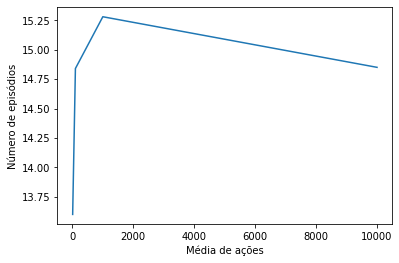

In [ ]:
means = []
for m in mcs:
    means.append(mean_actions(m.Q))
means

eps = [10, 100, 1000, 10000]
y = means
plt.xlabel("Média de ações")
plt.ylabel("Número de episódios")
plt.plot(eps, y)

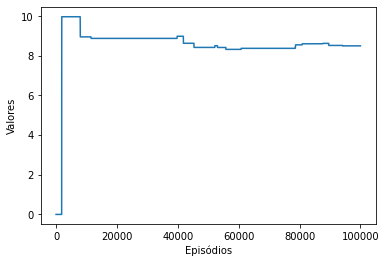

In [ ]:
mc = MonteCarlo(n_episodios=100000)
mc.main()
x = list(range(1, mc.n_episodios + 1))
y = mc.values
plt.ylabel("Valores")
plt.xlabel("Episódios")
plt.plot(x, y)